### **BAGGING**

Steps in the Bagging is
* Bootstrapping
* Aggregating

Suppose we have the dataset with the 10 columns. Lets take multiple base models with same algorithm. We train the models with some part of the data different to each i.e we do the smapling of the data and then train each base models of same algorithm.

Then from the majority of the classification we take the resulting classification which is known as aggregating.

**WHY DOES IT WORK?**
* What happens here is we properly balance the bias and varience. 
* We take the base models  with low bias and high varience. Then for each base models the models will take the sampled datasets with distributed no of noises in each samples. Here the models were already overfitting. Here impact already is distributed then the varience couldnot be very high. Thus aggregate will give the models with low varience and low bias.

###  **CODE DEMO**

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns

In [39]:
df=sns.load_dataset('iris')

In [40]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [41]:
from sklearn.preprocessing import LabelEncoder
#encoding the labels
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])
df.sample(7)

,sepal_length,sepal_width,petal_length,petal_width,species
27,5.2,3.5,1.5,0.2,0
9,4.9,3.1,1.5,0.1,0
10,5.4,3.7,1.5,0.2,0
80,5.5,2.4,3.8,1.1,1
34,4.9,3.1,1.5,0.2,0
130,7.4,2.8,6.1,1.9,2
128,6.4,2.8,5.6,2.1,2


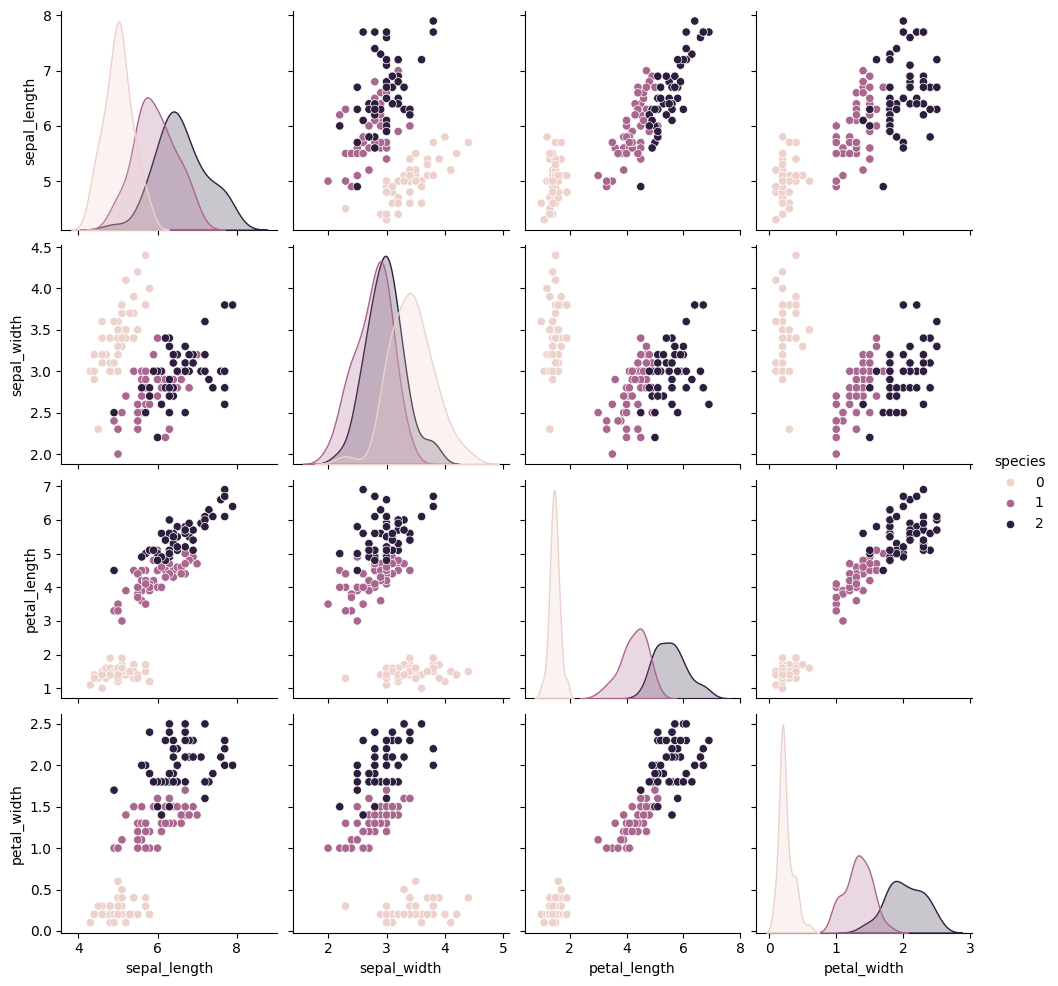

In [42]:
sns.pairplot(df,hue='species')

In [43]:
#to make the problem difficult we will take only two columns
df=df[df['species']!=0][['sepal_width','petal_length','species']]

In [44]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


<Axes: xlabel='sepal_width', ylabel='petal_length'>

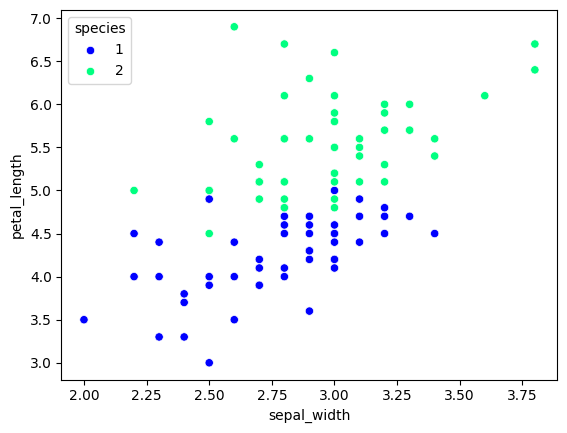

In [45]:
sns.scatterplot(data=df,x='sepal_width',y='petal_length',hue='species',palette='winter')

In [46]:
df.shape

(100, 3)

In [47]:
'''
since we have only 100 datas thus we will take smaple of
10 datsets for each modesl to train'''
df=df.sample(100)
df_train=df.iloc[:60,:].sample(10)
df_val=df.iloc[60:80,:].sample(5)
df_test=df.iloc[80:,:].sample(5)

In [48]:
df_train

,sepal_width,petal_length,species
67,2.7,4.1,1
61,3.0,4.2,1
102,3.0,5.9,2
68,2.2,4.5,1
54,2.8,4.6,1
138,3.0,4.8,2
133,2.8,5.1,2
123,2.7,4.9,2
74,2.9,4.3,1
121,2.8,4.9,2


In [49]:
X_test=df_val.iloc[:,0:2].values
y_test=df_val.iloc[:,-1].values

### **CASE 1- BAGGING**

In [50]:
#data for tree1
df_bag=df_train.sample(8,replace=True)
from sklearn.tree import DecisionTreeClassifier
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]
df_bag

,sepal_width,petal_length,species
102,3.0,5.9,2
123,2.7,4.9,2
133,2.8,5.1,2
133,2.8,5.1,2
54,2.8,4.6,1
133,2.8,5.1,2
68,2.2,4.5,1
61,3.0,4.2,1


In [51]:
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [52]:
import matplotlib.pyplot as plt

def evaluate(clf, X, y):
    clf.fit(X, y)
    plt.figure()  # New figure for tree plot
    plot_tree(clf)
    plt.show()
    plt.figure()  # New figure for decision regions
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    plt.show()
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test, y_pred))

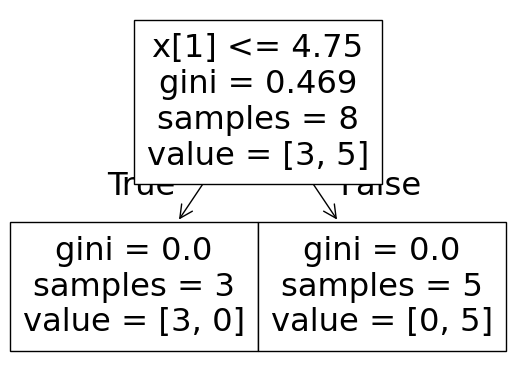

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


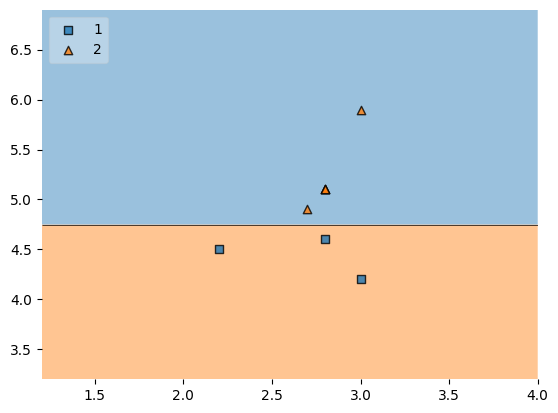

1.0


C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [53]:
dt_bag1=DecisionTreeClassifier()
evaluate(dt_bag1,X,y)

In [54]:
#data for tree1
df_bag=df_train.sample(8,replace=True)
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]
df_bag

,sepal_width,petal_length,species
123,2.7,4.9,2
123,2.7,4.9,2
133,2.8,5.1,2
102,3.0,5.9,2
123,2.7,4.9,2
67,2.7,4.1,1
68,2.2,4.5,1
67,2.7,4.1,1


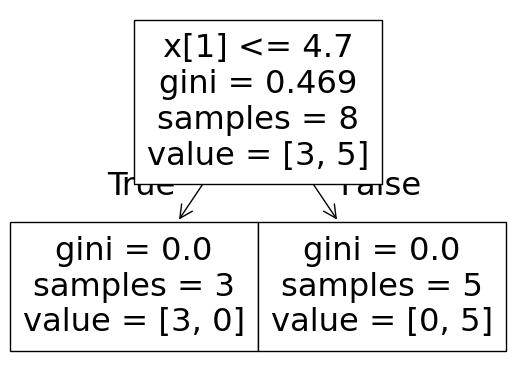

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


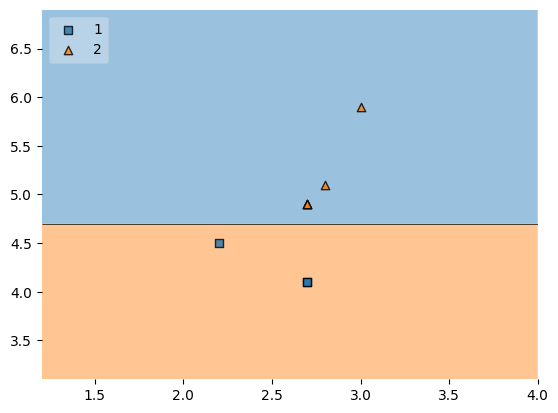

1.0


C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [55]:
dt_bag2=DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [56]:
#data for tree1
df_bag=df_train.sample(8,replace=True)
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]
df_bag

,sepal_width,petal_length,species
68,2.2,4.5,1
61,3.0,4.2,1
68,2.2,4.5,1
138,3.0,4.8,2
54,2.8,4.6,1
102,3.0,5.9,2
74,2.9,4.3,1
54,2.8,4.6,1


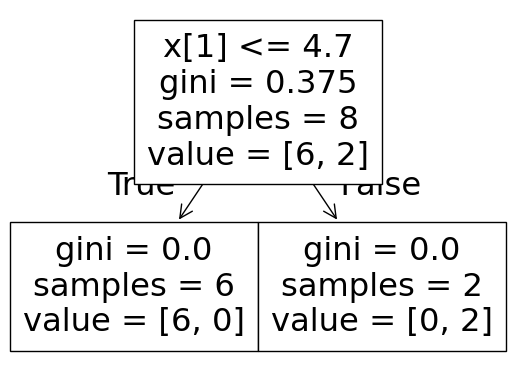

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


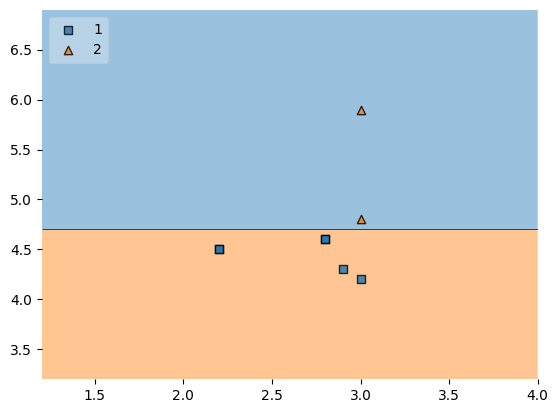

1.0


C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [57]:
dt_bag3=DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [58]:
df_test


,sepal_width,petal_length,species
107,2.9,6.3,2
60,2.0,3.5,1
92,2.6,4.0,1
88,3.0,4.1,1
148,3.4,5.4,2


In [67]:
print('Predictor1',dt_bag1.predict(np.array([3.9,1.7]).reshape(1,2)))
print('Predictor2',dt_bag2.predict(np.array([3.9,1.7]).reshape(1,2)))
print('Predictor3',dt_bag3.predict(np.array([3.9,1.7]).reshape(1,2)))

Predictor1 [1]
Predictor2 [1]
Predictor3 [1]


C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### **Pasting**:
* Here we do the row smapling but without replacing

### **RANDOM_SUBSPACES**
* We take only samples of columns and without or with replacement.

### **RANDOM PATCHES**

* We do the columns and the row sampling